In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


#analysing the data

In [4]:
#summary statistics
df.describe() # only possible with numeric variables, or continous

# for yrs.phd's std looks good, but yrs.services looks like there is outlyer

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


#outliers

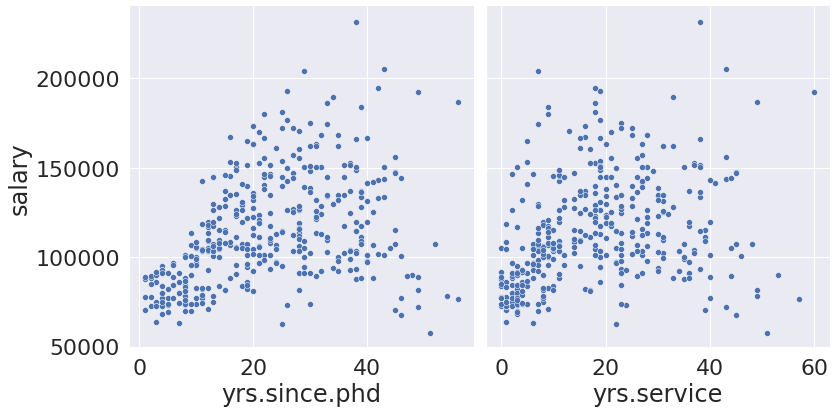

In [5]:
#plot
sns.set(font_scale=2)
sns.pairplot(data=df, 
             y_vars=['salary'],
             x_vars=['yrs.since.phd', 'yrs.service'],
             height=6)

> from the plot there is no huge outlier
> and these two variables looks correlate to each other

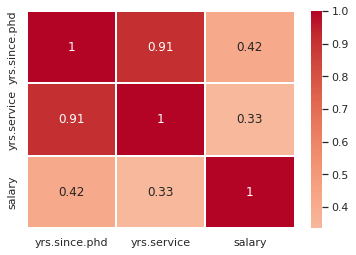

In [8]:
# correlation matrix
sns.set(font_scale=1)
sns.heatmap(df.corr(),
            annot=True,
            fmt='.2g',
            center=0,
            cmap='coolwarm',
            linewidths=1)

> yrs.service and yrs.since.phd are very correlated from above correlation matrix

> yrs.since.phd is more correlated to salary so we pick it

In [12]:
# catergorical variables
df.groupby('rank').count()

,discipline,yrs.since.phd,yrs.service,sex,salary
rank,,,,,
AssocProf,64,64,64,64,64
AsstProf,67,67,67,67,67
Prof,266,266,266,266,266


In [15]:
# or easier to use below
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [16]:
# select only data type of object
df.select_dtypes(include='object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [22]:
#using loop to check individual value counts:
for col in df.select_dtypes(include='object').columns:
  print(f'"{col}" value counts:')
  print(df[col].value_counts())
  print()

"rank" value counts:
Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

"discipline" value counts:
B    216
A    181
Name: discipline, dtype: int64

"sex" value counts:
Male      358
Female     39
Name: sex, dtype: int64



In [23]:
# look at data set
df.head(1)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750


In [26]:
# transform string columns into dummies
df = pd.get_dummies(data=df)
df.head()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1


#Multi-linear regression (data preparation)

In [31]:
# isolate X and y
y = df.salary / 1000
X = df.drop(columns=['salary','yrs.service']) # also drop the correlated value
X.head(1)

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,1,1,1


In [35]:
# add constant
X = sm.add_constant(X)
X.head(1)
# model = sm.OLS(endog=y, exog=X).fit()
# print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1


In [39]:
# training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=1502)
print(X_train.head(2))


     const  yrs.since.phd  rank_AsstProf  rank_Prof  discipline_B  sex_Male
105    1.0             31              0          1             0         1
287    1.0              2              1          0             0         1


#Multilinear regression

In [43]:
# model creation
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           1.65e-41
Time:                        08:05:51   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

#Accuracy Assessment

> the "Adj R-sqiared" is not good enough, and the "urs.since.phd" p value is 0.833 which is not significant to the result

In [45]:
#Predictions
predictions = model.predict(X_test)
predictions.head()

364    118.590061
30     134.868270
378    118.731635
188     99.876615
155    134.839955
dtype: float64

In [50]:
#Accuracy assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'RSME: {np.sqrt(mean_squared_error(y_test, predictions))}')

MAE: 18.221402310852046
RSME: 25.82489153477492


> RSME is greater than MAE, which means our dataset is more affected by outlier